# ЛР4. Выполнил Савчук В.С.

# В-23
# Задача 4.1.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# ЮАР (В варианте написано южная африка, но я не нашел абсолютно никаких значений населения южной африки ни за какой год, поэтому взял население ЮАР, ни у кого такого варианта нет)

In [2]:
x = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
y = [13.5, 17, 22, 28.5, 37, 45, 51, 59.5]

# 1) МНК

In [3]:
def MNK(n):
    b = np.zeros(n+1)
    for i in range(n+1):
        sum = 0
        for j in range(8):
            sum += y[j] * x[j]**i
        b[i] = sum
    s = np.zeros(2*n + 1)
    for i in range(2*n + 1):
        sum = 0
        for j in range(8):
            sum += x[j]**i
        s[i] = sum
    
    A = np.zeros((n+1,n+1))
    for i in range(n+1):
        for j in range(n+1):
            A[i][j] = s[j+i]
                
    return np.linalg.solve(A, b)

# Среднеквадратичная ошибка

In [4]:
def ASE(n):
    a = MNK(n)
    ans = 0
    for i in range(len(y)):
        cnt = 0
        for j in range(len(a)):
            cnt += a[j]*x[i]**j
        ans += (cnt - y[i])**2
    return (1/(n+1)*ans)**(1/2)

При n>46 получаем ошибку: "OverflowError: int too large to convert to float"

Минимальная ошибка =  0.029001054907431257
Степень при минимальной ошибке =  45


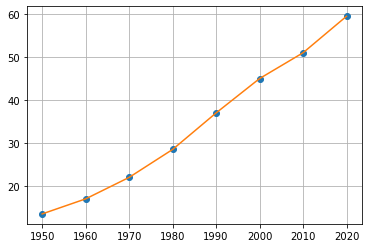

In [5]:
z=np.zeros(47)
for i in range(47):
    z[i] = (ASE(i))
print("Минимальная ошибка = ", np.min(z))
print("Степень при минимальной ошибке = ", np.argmin(z))
xnew = np.linspace(1950, 2020, 8)
plt.plot(xnew, y, "o", xnew, y)
plt.grid()

# С помощью встроенной функции 37 степени

Ошибка встроенной функции многочлена 37 степени =  0.0644421305342835


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


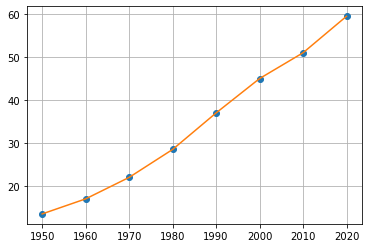

In [6]:
t = np.polyfit(x, y, 37)
f = np.poly1d(t)
plt.plot(x, y, "o", x, f(x))
plt.grid()
print("Ошибка встроенной функции многочлена 37 степени = ", ASE(37))

# Население ЮАР в 2019(инфа из интернета) = 58.5

# Население в 2019 году, с помощью встроенной функции

In [7]:
print(f(2019))

58.31321203708649


# Население в 2019 году, с помощью функции MNK

In [8]:
P = MNK(37)
sum = 0
for i in range(38):
    sum += (P[i]*2019**i)
print(sum)

58.26220328733325


# 2) Интерполяция

# Построим многочлен Лагранжа

In [9]:
def LAGRANZ(n):
    s = 0
    for j in range(len(y)):
        k1 = 1
        k2 = 1
        for i in range(len(x)):
            if i == j:
                k1 = k1*1; k2 = k2*1   
            else: 
                k1 = k1*(n-x[i])
                k2 = k2*(x[j]-x[i])
        s += y[j]*k1/k2
    return s

# Население в 2019 году, с помощью иногочлена Лагранжа

In [10]:
print(LAGRANZ(2019))

58.263638263125


# Встроенная функция

In [11]:
f = interpolate.interp1d(x, y, 7)
print("Значение функции многочлена 7 степени = ", f(2019))
f = interpolate.interp1d(x, y, 2)
print("Значение функции многочлена 2 степени = ", f(2019))

Значение функции многочлена 7 степени =  58.263638263124996
Значение функции многочлена 2 степени =  58.50135714285714


# Вывод: для МНК получили довольно маленькую погрешность. Погрешность МНК совпадает со встроенной, что показывает устойчивость и эффективность функции. Лагранж показал довольно точные цифры

# Задача 4.2

# Дана функция. Приблизить функцию методом интерполяции,
# используя многочлен Лагранжа. Степень многочлена N подобрать таким образом, чтобы максимальная величина погрешности на отрезке [a, b] не превышала заданной величины eps. Построить графики многочленов и графики погрешностей .Приблизить функцию
# методом интерполяции, указанным в индивидуальном варианте. Сравнить полученные htpekmnfns

# f(x) = cosx/x

# eps = 0.001

# Отрезок [2; 4]

# Многочлен Лагранжа

In [12]:
def LAGRANZ_1(xn,yn,t):
    sum=0
    for j in range(len(yn)):
        p1=1; p2=1
        for i in range(len(xn)):
            if i==j:
                p1=p1*1; p2=p2*1   
            else: 
                p1=p1*(t-xn[i])
                p2=p2*(xn[j]-xn[i])
        sum += yn[j]*p1/p2
    return sum

In [13]:
def F(x):
    return np.cos(3*x) / x

# Подберем степень многочлена, чтобы погрешность удовлетворяла eps

In [14]:
def poisk():
    i = 0
    x1 = np.linspace(2, 4, 10)
    y1 = [F(i) for i in x1]
    eps = 0.001
    x2 = np.linspace(2, 4, 100)
    while (abs(F(i) - LAGRANZ_1(x1,y1,i)) >= eps):
        x1 = np.linspace(2, 4, 10)
        y1 = [F(i) for i in x1]
        i += 1
    return i
          
print("Степень многочлена, удовлетворяющая погрешности = ", poisk())

Степень многочлена, удовлетворяющая погрешности =  2


C:\Users\DD69~1\AppData\Local\Temp/ipykernel_24420/2434487149.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return np.cos(3*x) / x


# Погрешность многочлена Лагранжа

In [15]:
def poisk3():
    x3 = np.linspace(2, 4, 10)
    y3 = [F(i) for i in x3]
    ans = [abs(F(i) - LAGRANZ_1(x3, y3, i)) for i in x3]
    return ans

print("Погрешности в узлах = ", poisk3())

Погрешности в узлах =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3877787807814457e-17, 0.0, 2.7755575615628914e-17]


# СПЛАЙН

In [16]:
x2 = np.linspace(2, 4, 10)

def F_proizv(x):
    return (-np.sin(x)*x+np.cos(x))/x**2

def Spline(x, y):
    buf = []
    A = np.zeros((3,3))
    b = np.zeros(3)
    for i in range(len(x) - 1):
        for j in range(3):
            A[0][j] = x[i]**(2-j)
            A[1][j] = x[i+1]**(2-j)
        A[2][0] = 2 * x[i]
        A[2][1] = 1
        b[0] = y[i]
        b[1] = y[i+1]
        if i == 0:
            b[2] = F_proizv(x[0])
        else:
            b[2] = 2 * buf[i-1][0] * x[i] + buf[i-1][1]
        buf.append(np.linalg.solve(A, b))
    return buf

def solve(t, spl):
    ans = 0
    for i in range(len(x2) - 1):
        if (t >= x2[i] and t <= x2[i+1]):
            ans = spl[i][0] * t**2 + spl[i][1] * t + spl[i][2]
    return ans
        
def poisk2():
    x2 = np.linspace(2, 4, 10)
    y2 = [F(i) for i in x2]
    spl = Spline(x2,y2)
    ans = [abs(F(i) - solve(i, spl)) for i in x2]
    return ans
                   
print("Погрешность в каждом узле = ", poisk2())

Погрешность в каждом узле =  [2.7755575615628914e-16, 1.8318679906315083e-15, 3.608224830031759e-15, 6.522560269672795e-16, 2.3869795029440866e-15, 7.216449660063518e-16, 9.603429163007604e-15, 5.509481759702339e-15, 5.995204332975845e-15, 8.049116928532385e-16]


# Составим графики погрешностей

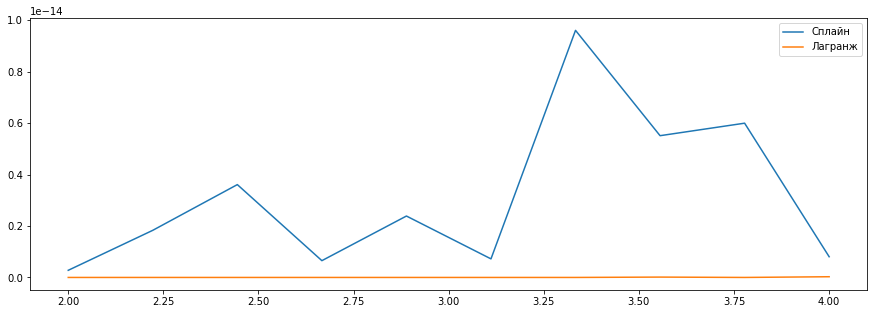

In [17]:
err = poisk2()
err_l = poisk3()
length = np.linspace(2, 4, 10)
fig, axs = plt.subplots(1,1, figsize = (15,5))
axs.plot(length, err, label = "Сплайн")
axs.plot(length, err_l, label = "Лагранж")
axs.legend()

# Составим графифки многочленов

[0.480085143325183, 0.41731546637293887, 0.20349926227518372, -0.05456251267823008, -0.25135473016478943, -0.32008559553908283, -0.2517214587229358, -0.09084639329307562, 0.08771653759965292, 0.210963489683123]


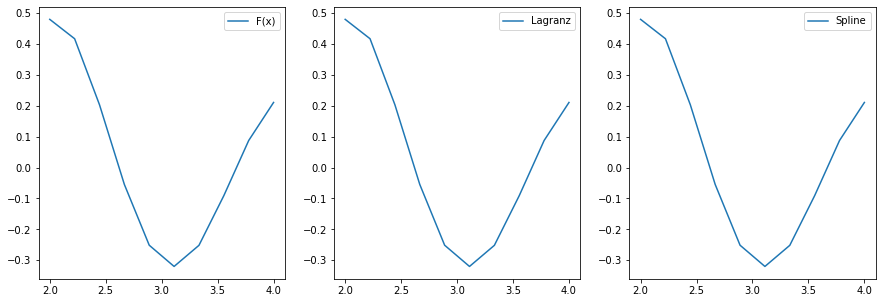

In [18]:
a1 = np.linspace(2, 4, 10)
z1 = [F(i) for i in a1]
z2 = []
for i in a1:
    z2.append(LAGRANZ_1(a1, z1, i))
spl2 = Spline(a1, z1)
z3 = [solve(i, spl2) for i in a1]
fig, axs = plt.subplots(1,3, figsize = (15,5))
print(z2)
axs[0].plot(a1, z1, label="F(x)")
axs[1].plot(a1, z2, label="Lagranz")
axs[2].plot(a1, z3, label="Spline")
axs[0].legend()
axs[1].legend()
axs[2].legend()

# Вывод: Графики получились идентичные, так как погрешности Лагранжа и сплайна минимальны

# Задача 4.3

# Задана функция $f(x) = x^2*exp(-x)$ , определенная на отрезке [-1;1]. Требуется разложить функцию в ряд Тейлора в окрестности нуля с точностью eps и произвести экономизацию полученного степенного ряда.

In [19]:
import math

# F(x) - исходная функция, F_coef(i) - коэфиициэнт i-го элемента в разложении Тейлора, S(x, c) - сумма n членов ряда по коэффициенту c_n

In [20]:
a = -1
b = 1
cnt = 10
x = np.linspace(a, b, cnt)

def F(x):
    return x**2*np.exp(-x)

def F_coef(i):
    return 1/ math.factorial(i)

def S(x, c):
    sum = 0
    for i in range(len(c)):
        sum += x**2*((-x)**i) * F_coef(i)
    return sum


# Массив коэффициентов

In [21]:
def mas_coef(n):
    mas = []
    for i in range(n):
        mas.append(F_coef(i))
    return mas

p = mas_coef(4)

# Пусть eps = 10^(-5). Функция асс(х) определяет требуемое количество слагаемых для достижения требуемой точности

In [22]:
def acc(x, p):
    eps = 10**(-5)
    i = 0
    while abs(S(x[i], p) - F(x[i])) >= eps:
        i += 1
    return i

z = acc(x, p)
print("Требуемое кол-во слагаемых для достижения заданной точности = ", z)

Требуемое кол-во слагаемых для достижения заданной точности =  4


# Построим графики исходной функции и суммы ряда Тейлора n членов

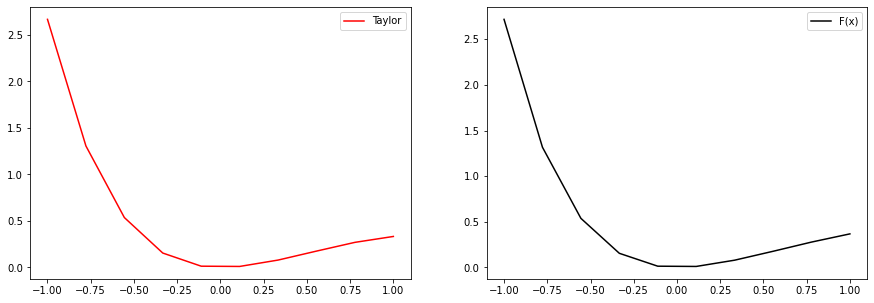

In [23]:
fig, axs = plt.subplots(1,2, figsize = (15,5))
axs[0].plot(x, S(x, p), label="Taylor", color="red")
axs[1].plot(x, F(x), label="F(x)", color="black")
axs[0].legend()
axs[1].legend()

# Экономизация степенного ряда

$x^6 = 1/32*(148x^4-18x^2+1+T_6)$

In [24]:
p[0] += 1/(32*math.factorial(7))
p[1] -= 18/(32*math.factorial(7))
p[2] += 148/(32*math.factorial(7))
p[3] = 0

# Строим график погрешности экономизации

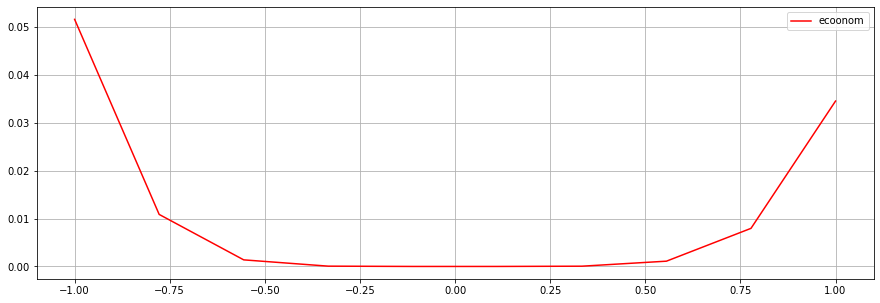

In [25]:
fig, axs = plt.subplots(1,1, figsize = (15,5))
axs.plot(x,np.abs(F(x) - S(x,p)), color ='r', label = 'ecoonom')
axs.grid()
axs.legend()

# вывод: после уменьшения количества слагаемых на 1, необходимая точность не сохраняется, а значит ряд нельзя сократить с сохранением первоначальной точности